In [4]:
#!pip install neuralprophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pickle  #to save our trained model as an object that can be resued by other coders
#from neuralprophet import NeuralProphet


In [16]:
df = pd.read_csv(r'weatherAUS.csv')
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [22]:
df.Location.unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
df.MaxTemp.unique()

array([22.9, 25.1, 25.7, 28. , 32.3, 29.7, 25. , 26.7, 31.9, 30.1, 30.4,
       21.7, 18.6, 21. , 24.6, 27.7, 20.9, 22.5, 25.6, 29.3, 33. , 31.8,
       30.9, 32.4, 33.9, 32.7, 27.2, 24.2, 24.4, 26.5, 23.9, 28.8, 34.6,
       35.8, 37.9, 38.9, 28.3, 28.4, 30.8, 32. , 34.7, 37.7, 43. , 32.2,
       36.6, 39.9, 38.1, 34. , 35.2, 30.6, 34.3, 38.4, 38.2, 40.7, 41.5,
       42.9, 42.7, 43.1, 38.3, 36.9, 41.2, 42.2, 44.8, 40.2, 31.2, 27.3,
       21.6, 29. , 29.2, 31.3, 31.1, 29.1, 31.7, 33.2, 29.6, 32.6, 34.5,
       30.3, 22.1, 22. , 24. , 27.9, 30.2, 30.5, 25.8, 27. , 19.7, 21.9,
       25.3, 33.5, 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 29.9, 32.1,
       28.1, 21.4, 24.9, 25.4, 20. , 23.4, 22.7, 16.2, 15.8, 12.9, 11.5,
       14.5, 12.2, 16.5, 17. , 19.2, 18.9, 19.1, 18.8, 19.3, 18.4, 19. ,
       20.5, 19.5, 17.7, 18.5, 15.1, 16.3, 16.6, 16.4, 15.6, 19.8, 21.1,
       20.3, 18.1, 15.7, 16.8, 17.1, 14.3, 13.4, 17.4, 16.1, 10.5, 11.6,
       12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9, 14

In [11]:
df.dtypes  #Date is an object so convert to datetime object


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

     -------------------------------------- 132.7/132.7 kB 2.6 MB/s eta 0:00:00
     ------------------------------------- 162.5/162.5 MB 12.3 MB/s eta 0:00:00
     ------------------------------------- 519.2/519.2 kB 33.9 MB/s eta 0:00:00
     ------------------------------------- 827.8/827.8 kB 54.5 MB/s eta 0:00:00
     ------------------------------------- 412.6/412.6 kB 26.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 44.7 MB/s eta 0:00:00
     --------------------------------------- 15.3/15.3 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 42.0 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 42.3 MB/s eta 0:00:00
     ---------------------------------------- 46.4/46.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to bu

In [12]:
'''We only want to work with Melbourne's data'''
df_melb = df[df['Location']=='Melbourne']

In [13]:
df_melb.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,2713.000000,2712.000000,2435.000000,3190.000000,3192.000000,3179.000000,3191.00000,3193.000000,2711.000000,2706.000000,2713.000000,2710.000000,2159.000000,2087.000000,2712.000000,2709.000000
mean,11.779174,20.769358,1.870062,4.650282,6.385307,45.610255,19.12880,22.097401,67.545555,51.180710,1017.634427,1015.778450,5.314034,5.336368,14.596091,19.264489
std,4.208313,6.036381,5.137060,3.320880,3.904811,15.982547,11.58588,9.981196,14.689456,16.131308,7.806738,7.621166,2.459786,2.280631,4.786288,5.748057
min,1.400000,9.700000,0.000000,0.000000,0.000000,11.000000,0.00000,0.000000,14.000000,6.000000,988.900000,988.300000,0.000000,0.000000,2.900000,7.200000
25%,8.700000,16.100000,0.000000,2.200000,3.100000,33.000000,11.00000,15.000000,58.000000,41.000000,1012.600000,1010.700000,3.000000,4.000000,11.275000,14.900000
50%,11.400000,19.500000,0.000000,4.000000,6.500000,43.000000,17.00000,20.000000,68.000000,51.000000,1017.900000,1016.150000,7.000000,6.000000,14.100000,18.200000
75%,14.600000,24.200000,1.200000,6.400000,9.600000,56.000000,26.00000,28.000000,78.000000,61.000000,1023.000000,1021.100000,7.000000,7.000000,17.400000,22.500000
max,28.600000,46.400000,82.200000,23.800000,13.900000,122.000000,67.00000,76.000000,100.000000,100.000000,1039.000000,1035.800000,8.000000,8.000000,35.500000,45.400000


In [14]:
'''Always Need to convert date column from object to datetime format for any time series model'''
df_melb['Date'] = pd.to_datetime(df_melb['Date'])

C:\Users\Checkout\AppData\Local\Temp\ipykernel_17288\1094022065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melb['Date'] = pd.to_datetime(df_melb['Date'])


In [15]:
df_melb.dtypes


Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [23]:
len(df)


145460

In [24]:
len(df_melb)

3193

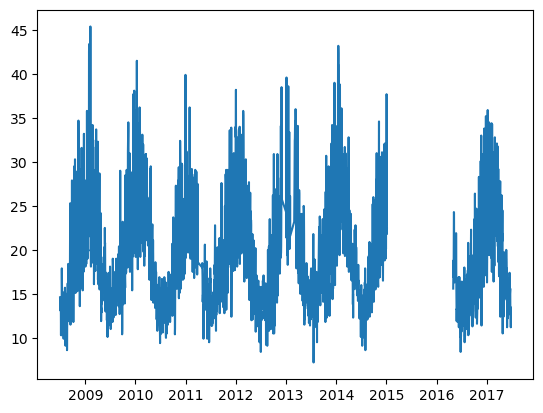

In [25]:
plt.plot(df_melb['Date'], df_melb['Temp3pm'])
plt.show()
# Missing data from 2015 - mid 2016 and we want to make sure we dont pass missing values to NeuralProphet so we will cutoff our dataset from 2015


In [26]:
# Filtering dataframe to have values till 2015 
df_melb_2015 = df_melb[df_melb['Date'].dt.year<=2015]
df_melb_2015['Date'].dt.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

<AxesSubplot:xlabel='Date'>

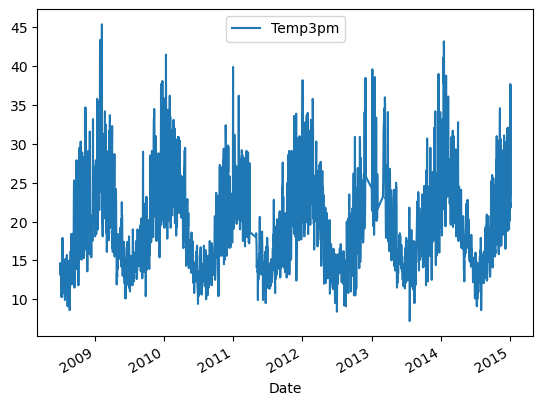

In [27]:
df_melb_2015.plot('Date','Temp3pm')


# Train the Model
NeuralProphet expects only the date column and the column we want to predict

In [28]:
data = df_melb_2015[['Date','Temp3pm']]
data.head()

,Date,Temp3pm
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


In [30]:
data.isna().sum() #checking for missing values


Date         0
Temp3pm    363
dtype: int64

In [32]:
data.dropna(how = 'any', inplace=True) # When how='any', the method drops any row that contains at least one missing value, and when how='all', the method drops only rows where all columns contain missing values.


C:\Users\Checkout\AppData\Local\Temp\ipykernel_17288\3002767713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how = 'any', inplace=True) # When how='any', the method drops any row that contains at least one missing value, and when how='all', the method drops only rows where all columns contain missing values.


In [33]:
data.isna().sum()


Date       0
Temp3pm    0
dtype: int64

In [34]:
data.reset_index(drop=True,inplace=True)
data.head()

,Date,Temp3pm
0,2008-07-01,14.6
1,2008-07-02,13.7
2,2008-07-03,13.9
3,2008-07-04,13.1
4,2008-07-05,14.6


In [35]:
len(data)

2288

In [37]:
data_train = data.iloc[:2000,:]
data_test = data.iloc[2000:,:]

In [44]:
import pickle  #to save our trained model as an object that can be resued by other coders
from neuralprophet import NeuralProphet

In [45]:
data_train.columns = ['ds', 'y'] #required naming convention for model to understand input and output columns


In [46]:
m = NeuralProphet()
model = m.fit(data_train, freq='D')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.65% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 158
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (63) is too small than the required number for the learning rate finder (233). The results might not be optimal.


Finding best initial lr:   0%|          | 0/233 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [47]:
data_test.columns = ['ds','y']


In [48]:
output = m.predict(data_test)
output

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.653% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.653% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2014-03-24,18.4,23.181061,19.838364,3.682957,-0.340260
1,2014-03-25,24.4,23.758156,19.838612,3.591372,0.328170
2,2014-03-26,26.3,23.358063,19.838860,3.494935,0.024268
3,2014-03-27,25.3,23.392818,19.839108,3.393697,0.160011
4,2014-03-28,21.5,23.167885,19.839355,3.287749,0.040781
...,...,...,...,...,...,...
283,2015-01-01,23.7,24.639404,19.908512,4.570880,0.160011
284,2015-01-02,37.7,24.659428,19.908758,4.709889,0.040781
285,2015-01-03,37.4,24.626785,19.909006,4.849117,-0.131340
286,2015-01-04,21.8,24.815479,19.909254,4.987853,-0.081630


In [43]:
!pip install neuralprophet


In [66]:

output['Residuals'] = output['y'] - output['yhat1']
print (output['Score_diff'])


0      -4.781061
1       0.641844
2       2.941937
3       1.907182
4      -1.667885
         ...    
283    -0.939404
284    13.040572
285    12.773215
286    -3.015479
287    -2.294614
Name: Score_diff, Length: 288, dtype: float64


In [68]:
np.mean(output['Residuals'].apply(lambda x:abs(x)))  #test error


2.6680959827370128

# Future forecast and visualizing trends


In [70]:
future = m.make_future_dataframe(data_train, periods = 900)
forecast = m.predict(future)
forecast.head(900)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.65% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2014-03-24,None,23.181061,19.838364,3.682957,-0.340260
1,2014-03-25,None,23.758156,19.838612,3.591372,0.328170
2,2014-03-26,None,23.358063,19.838860,3.494935,0.024268
3,2014-03-27,None,23.392818,19.839108,3.393697,0.160011
4,2014-03-28,None,23.167885,19.839355,3.287749,0.040781
...,...,...,...,...,...,...
895,2016-09-04,None,17.034435,20.060204,-2.944140,-0.081630
896,2016-09-05,None,16.867041,20.060452,-2.853152,-0.340260
897,2016-09-06,None,17.623615,20.060699,-2.765256,0.328170
898,2016-09-07,None,17.404476,20.060947,-2.680739,0.024268


In [71]:
m.plot(forecast)   #the predicted graph is similar to what we had seen during EDA which is good


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '79ee92f4-e284-4169-8cbd-2552ab4659ff',
              'x': array([datetime.datetime(2014, 3, 24, 0, 0),
                          datetime.datetime(2014, 3, 25, 0, 0),
                          datetime.datetime(2014, 3, 26, 0, 0), ...,
                          datetime.datetime(2016, 9, 6, 0, 0),
                          datetime.datetime(2016, 9, 7, 0, 0),
                          datetime.datetime(2016, 9, 8, 0, 0)], dtype=object),
              'y': array([23.18106079, 23.75815582, 23.35806274, ..., 17.62361526, 17.40447617,
                          17.62135315])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '58c

In [72]:
m.plot_components(forecast)


FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'a66f9e57-0794-41d5-a9aa-29238684cb14',
              'x': array([datetime.datetime(2014, 3, 24, 0, 0),
                          datetime.datetime(2014, 3, 25, 0, 0),
                          datetime.datetime(2014, 3, 26, 0, 0), ...,
                          datetime.datetime(2016, 9, 6, 0, 0),
                          datetime.datetime(2016, 9, 7, 0, 0),
                          datetime.datetime(2016, 9, 8, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([19.83836365, 19.8386116 , 19.83885956, ..., 20.06069946, 20.06094742,
                          20.06119537]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',
  

In [74]:
m.plot(output)   # how well the model has learnt the trend 


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '2cea0fd7-f45b-4f4a-8daf-bc4d45096093',
              'x': array([datetime.datetime(2014, 3, 24, 0, 0),
                          datetime.datetime(2014, 3, 25, 0, 0),
                          datetime.datetime(2014, 3, 26, 0, 0), ...,
                          datetime.datetime(2015, 1, 3, 0, 0),
                          datetime.datetime(2015, 1, 4, 0, 0),
                          datetime.datetime(2015, 1, 5, 0, 0)], dtype=object),
              'y': array([23.18106079, 23.75815582, 23.35806274, ..., 24.62678528, 24.81547928,
                          24.69461441])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '4a3

In [76]:
m.plot_parameters()


FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': '441d9bf2-851b-4604-b318-25de386825f4',
              'x': array([datetime.datetime(2008, 7, 1, 0, 0),
                          datetime.datetime(2008, 7, 2, 0, 0),
                          datetime.datetime(2008, 7, 4, 0, 0), ...,
                          datetime.datetime(2014, 3, 19, 0, 0),
                          datetime.datetime(2014, 3, 20, 0, 0),
                          datetime.datetime(2014, 3, 23, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([18.79628968, 18.80186416, 18.81301312, ..., 19.83712537, 19.83737324,
                          19.83811684]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': '